# Tugas 2 : Menghitung Jarak

In [22]:
# import library
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [23]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
job_data = pd.read_csv('https://raw.githubusercontent.com/NessaRNG/DataMining/main/TugasPendat/Test.csv')
job_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [24]:
# Show all columns from dataframe
job_data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [25]:
job_data[['Gender', 'Ever_Married']].head(10)

,Gender,Ever_Married
0,Female,Yes
1,Male,Yes
2,Female,Yes
3,Male,Yes
4,Female,No
5,Male,Yes
6,Male,Yes
7,Female,Yes
8,Male,Yes
9,Male,No


In [26]:
# Gender code
Gender_female = "F"
Gender_male = "M"

# binary value
value_one = 1
value_zero = 0

def change_Gender_to_binary(Gender):
    return value_one if Gender == Gender_male else value_zero

In [27]:
# lunch code
status_placed = "Yes"
status_not_placed = "No"

# binary value
value_one = 1
value_zero = 0

def change_lunch_to_binary(status):
    return value_one if status == status_not_placed else value_zero

In [28]:
# Update all values
job_data["Gender"] = job_data["Gender"].apply(change_Gender_to_binary)
job_data["Ever_Married"] = job_data["Ever_Married"].apply(change_status_to_binary)

NameError: ignored

In [29]:
job_data[['Gender', 'Ever_Married']].head(10)

,Gender,Ever_Married
0,0,Yes
1,0,Yes
2,0,Yes
3,0,Yes
4,0,No
5,0,Yes
6,0,Yes
7,0,Yes
8,0,Yes
9,0,No


In [30]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

PROBALITY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [31]:
def get_series(job_data, idx, series):
    return job_data.loc[(idx), series]

In [32]:
def dissimilarity_dataset(job_data, series_index = [], series = []):
    first_series = get_series(job_data, series_index[0], series)
    second_series = get_series(job_data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [33]:
dissimilarity_dataset(job_data, [1,2], ["Gender", "Ever_Married"]).T

,1,2
Gender,0,0
Ever_Married,Yes,Yes


In [34]:
job_data.loc[0:4, ["Gender", "Ever_Married"]]

,Gender,Ever_Married
0,0,Yes
1,0,Yes
2,0,Yes
3,0,Yes
4,0,No


In [ ]:
def count_probality_value(job_data, start_index = 0, last_index = 1):

    PROBALITY_VALUE = {"q" : 0, "r" : 0, "s" : 0, "t" : 0}

    column_range = job_data.shape[1]

    for column in range(column_range):
        for value in PROBALITY_TABLE_VALUE:
            item = list((tuple(job_data.loc[(start_index):(last_index), job_data.columns[column]]) == PROBALITY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    PROBALITY_VALUE["q"] += 1
                if item[1] == "r":
                    PROBALITY_VALUE["r"] += 1
                if item[1] == "s":
                    PROBALITY_VALUE["s"] += 1
                if item[1] == "t":
                    PROBALITY_VALUE["t"] += 1

    return PROBALITY_VALUE

In [ ]:
# dimensi (1,2)
dimensi_1_2 = dissimilarity_dataset(job_data, [1,2], ["Gender", "Ever_Married"])

In [ ]:
probality_d_1_2 = count_probality_value(dimensi_1_2, 1, 2)

In [ ]:
# dimensi (1,3)
dimensi_1_3 = dissimilarity_dataset(job_data, [1,3], ["Gender", "Ever_Married"])

In [ ]:
probality_d_1_3 = count_probality_value(dimensi_1_3, 1, 3)

In [ ]:
# dimensi (1,4)
dimensi_1_4 = dissimilarity_dataset(job_data, [1,4], ["Gender", "Ever_Married"])

In [ ]:
probality_d_1_4 = count_probality_value(dimensi_1_4, 1, 4)

Dissimilarity Binary Symetric Value Formula

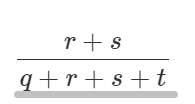

In [ ]:
def dissimilarity_binary_symetric_distance(probality_value):
  
    return (probality_value["r"] + probality_value["s"]) / (probality_value["q"] + probality_value["r"] + probality_value["s"] + probality_value["t"])

In [ ]:
dimensi_1_2 = dissimilarity_binary_symetric_distance(probality_d_1_2)
dimensi_1_3 = dissimilarity_binary_symetric_distance(probality_d_1_3)
dimensi_1_4 = dissimilarity_binary_symetric_distance(probality_d_1_4)

In [ ]:
#d1 dan d2

dimensi_1_2

In [ ]:
# d1 dan d4

dimensi_1_3

In [ ]:
# d1 dan d4

dimensi_1_4